In [ ]:
pip install biomass

In [5]:
import os

import numpy as np
from biomass.dynamics.solver import *
from tqdm import tqdm

from model import *


def compute_matrix():
    os.makedirs("data", exist_ok=True)

    sim_n = 101
    sim_t = range(5401)
    sim_ligand = ["EGF", "HRG"]

    z_cFosmRNA = np.empty((len(sim_ligand), sim_n, len(sim_t)))
    norm_max = np.empty_like(sim_ligand, dtype=float)
    x = param_values()
    y0 = initial_values()
    y_ss = get_steady_state(diffeq, y0, tuple(x))
    for i in tqdm(range(sim_n)):
        x = param_values()
        x[C.p11] *= (1 - 0.01 * i)
        for j, ligand in enumerate(sim_ligand):
            x[C.Ligand] = x[C.NAMES.index(ligand)]
            sol = solve_ode(diffeq, y_ss, sim_t, tuple(x))
            if i == 0:
                norm_max[j] = np.max(sol.y[V.cfosmRNAc, :])
            z_cFosmRNA[j, i, :] = sol.y[V.cfosmRNAc, :] / norm_max[j]

    np.save(os.path.join("data", "z_cFosmRNA.npy"), z_cFosmRNA)


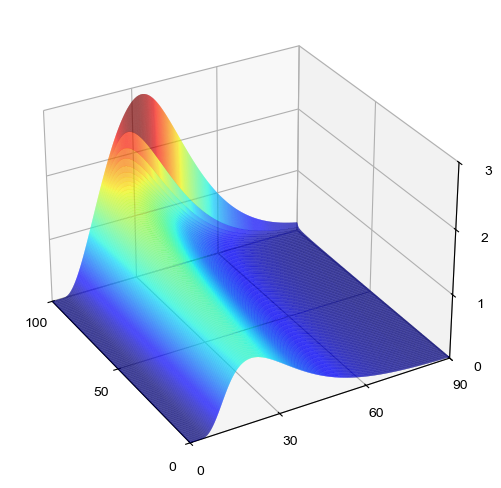

In [9]:
import matplotlib.pyplot as plt ; import numpy as np
class Plot3D(object):
    def __init__(self, x, y, z):
        self.x = x      ; self.y = y      ; self.z = z # 2d array
        fig = plt.figure(figsize=(8, 6))  ; self.ax = fig.add_subplot(111, projection='3d')
    def surf_plot(self):
        self.ax.plot_surface(*np.meshgrid(self.x, self.y), self.z, shade=True, cmap='jet', rstride=1, cstride=1) ; self.ax.view_init(azim=-30)
        self.ax.set_xlim(0, 100) ; self.ax.set_xticks([0, 50, 100]) ; self.ax.set_xticklabels(['100', '50', '0'])
        self.ax.set_ylim(0, 90) ; self.ax.set_yticks([0, 30, 60, 90])
        self.ax.set_zlim(0, 3) ; self.ax.set_zticks([0, 1, 2, 3])
def main():
    x = (1-np.arange(101)/100)*100   ;  y = np.arange(5401) / 60

    z = np.load('data/z_cFosmRNA.npy')[0].T

    plt.rcParams['font.size'] = 10 ; plt.rcParams['font.family'] = 'Arial' ; plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.it'] = 'Arial:italic' ; plt3d = Plot3D(x, y, z) ; plt3d.surf_plot() ; plt.show()
if __name__ == '__main__':
    main()